In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
fp = '../Data/table1c.fits'
# df = pd.read_csv(fp, header=None)
df = Table.read(fp, format='fits').to_pandas()

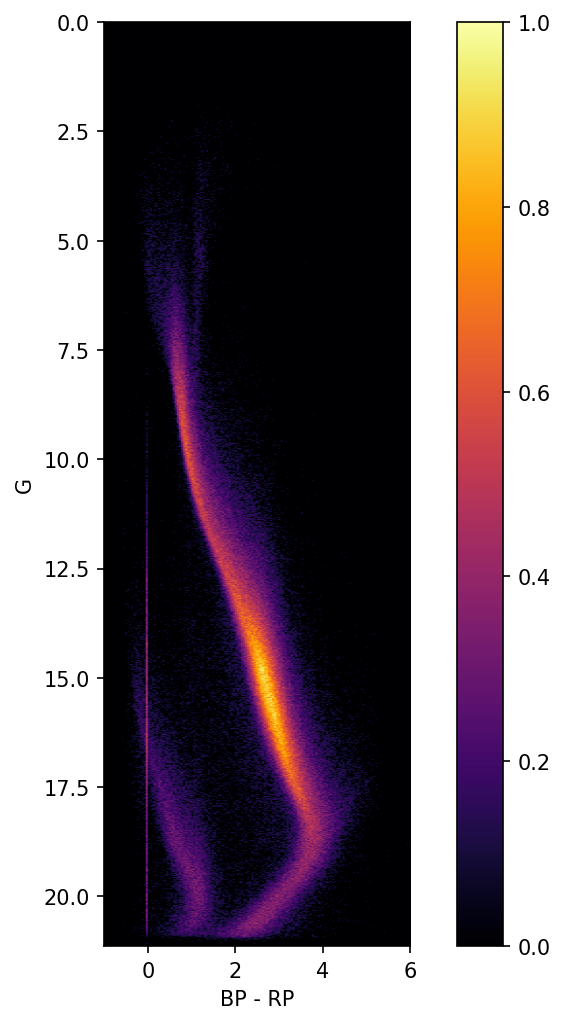

In [5]:
x = df['BPmag'] - df['RPmag']
y = df['Gmag']

# Define grid
x_bins = np.linspace(x.min(), x.max(), 900)
y_bins = np.linspace(y.min(), y.max(), 900)

# Compute 2D histogram as density proxy
hist, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins])
hist = hist.T  # Transpose for proper orientation

# Normalize histogram
hist = hist / hist.max()

fig, ax = plt.subplots(dpi=150, figsize=(8, 8))

# Plot using imshow
points = ax.imshow(np.sqrt(hist), origin='lower', cmap='inferno',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# show the colorbar
cbar = plt.colorbar(points)

ax.invert_yaxis()
ax.set_xlim(-1, 6)

# Set labels
ax.set_xlabel('BP - RP')
ax.set_ylabel('G')

# plt.title('Scatter Plot with Square Root of Relative Density')
# plt.show()
plt.savefig('ASTR-400A-HWs/figs/HRD.png')
